In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('emails.csv')
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [ ]:
df.shape

(5172, 3002)

In [ ]:
df.isna().sum()

,0
Email No.,0
the,0
to,0
ect,0
and,0
...,...
military,0
allowing,0
ff,0
dry,0


In [ ]:
df.dropna(inplace=True)
df.drop(columns='Email No.', inplace=True)

In [ ]:
df['Prediction'] = df['Prediction'].replace({0:'Not spam', 1:'Spam'})
df

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,Not spam
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,Not spam
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,Not spam
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,Not spam
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,Not spam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,Not spam
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,1,0,Not spam
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,Spam
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,1,0,Spam


In [ ]:
X = df.drop(columns='Prediction',axis = 1)
Y = df['Prediction']

In [ ]:
X.columns

Index(['the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou', 'in',
       ...
       'enhancements', 'connevey', 'jay', 'valued', 'lay', 'infrastructure',
       'military', 'allowing', 'ff', 'dry'],
      dtype='object', length=3000)

In [ ]:
Y.head()

,Prediction
0,Not spam
1,Not spam
2,Not spam
3,Not spam
4,Not spam


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=1)

In [ ]:
x_train.isna().sum()

,0
the,0
to,0
ect,0
and,0
for,0
...,...
infrastructure,0
military,0
allowing,0
ff,0


{'n': 4, 'M': 91.78743961352657}


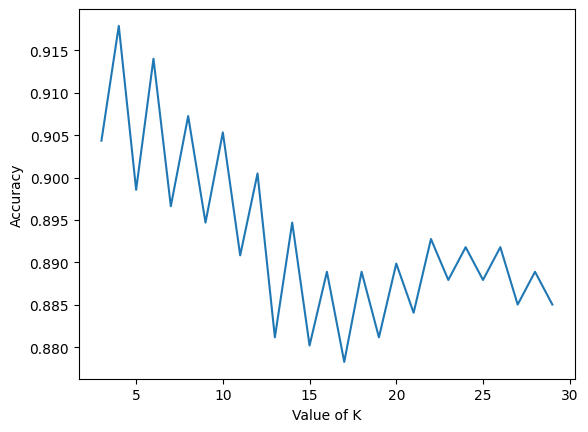

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt  # Assuming you need this for plotting

KN = KNeighborsClassifier
scores = {}
scores_list = []
max_stats = {'n': 3, 'M': 0.00}

def calcKNN(n):
    knn = KN(n_neighbors=n, p=1)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    M = metrics.accuracy_score(y_test, y_pred)
    M = M * 100
    scores[n] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))
    if M > max_stats['M']:
        max_stats['M'] = M
        max_stats['n'] = n

for i in range(3, 30):
    calcKNN(i)

plt.plot(range(3, 30), scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
print(max_stats)

In [ ]:
knn_model =KNeighborsClassifier(n_neighbors=4)
knn_model.fit(x_train,y_train)
y_pred =knn_model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Not spam       0.90      0.91      0.91       719
        Spam       0.80      0.77      0.78       316

    accuracy                           0.87      1035
   macro avg       0.85      0.84      0.84      1035
weighted avg       0.87      0.87      0.87      1035



In [ ]:
from sklearn.svm import SVC
svm_model =SVC()
svm_model.fit(x_train,y_train)

SVC()

In [ ]:
y_pred =svm_model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Not spam       0.79      0.97      0.87       719
        Spam       0.87      0.40      0.55       316

    accuracy                           0.80      1035
   macro avg       0.83      0.69      0.71      1035
weighted avg       0.81      0.80      0.77      1035

